In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv('diabetes.csv')
print(diabetes_data['Outcome'].value_counts())

0    500
1    268
Name: Outcome, dtype: int64


In [2]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
def get_clf_eval(y_test, pred = None, pred_proba = None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차행렬')
    print(confusion)
    print("정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, F1 : {3:.4f}, AUC : {4:.4f}"\
         .format(accuracy, precision, recall, f1, roc_auc))

In [17]:
X= diabetes_data.iloc[:]
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [17]:
X = diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=156, stratify = y)
lr_clf = LogisticRegression(solver = 'liblinear')
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]
get_clf_eval(y_test,pred,pred_proba)

오차행렬
[[87 13]
 [22 32]]
정확도 : 0.7727, 정밀도 : 0.7111, 재현율 : 0.5926, F1 : 0.6465, AUC : 0.8083


In [21]:
def precision_recall_curve_plot(y_test=None, pred_proba_c1=None):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

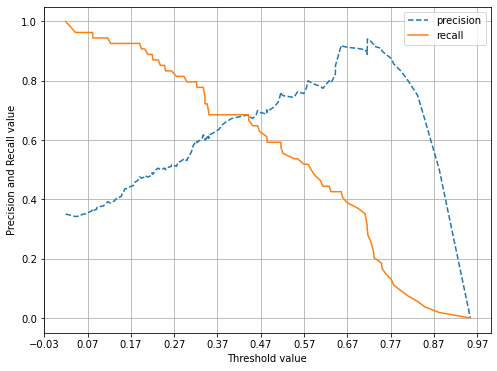

In [22]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test, pred_proba_c1)

In [23]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
zero_features_mean = diabetes_data[zero_features].mean()
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0,zero_features_mean)

In [24]:
X = diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:,-1]
scaler = StandardScaler()
x_scaler = scaler.fit_transform(X)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(x_scaler, y, test_size = 0.2, random_state = 156, stratify = y)
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]
get_clf_eval(y_test, pred, pred_proba)

오차행렬
[[90 10]
 [21 33]]
정확도 : 0.7987, 정밀도 : 0.7674, 재현율 : 0.6111, F1 : 0.6804, AUC : 0.8433


In [46]:
print(pred_proba)

[0.03561423 0.20068404 0.157666   0.56657604 0.41439664 0.75446829
 0.83917261 0.15064834 0.19288548 0.10662769 0.66807128 0.39434784
 0.04656127 0.39070237 0.26363069 0.09221068 0.79317522 0.08837243
 0.5844643  0.8036486  0.41610897 0.34759055 0.06374481 0.31740729
 0.29788187 0.10409624 0.92102879 0.74917785 0.17258479 0.88834749
 0.22884491 0.23579979 0.11190966 0.15169081 0.10217543 0.74205389
 0.22076285 0.20662792 0.85291458 0.6633152  0.4099781  0.23486812
 0.7026767  0.12921675 0.34381359 0.0147951  0.46453351 0.08790517
 0.48686254 0.32870983 0.30974516 0.91792546 0.89718877 0.06088874
 0.12539603 0.42885602 0.06942844 0.35335639 0.32985071 0.39350926
 0.17921496 0.83696821 0.33329831 0.62375678 0.30333217 0.10268384
 0.24320039 0.71832409 0.1460878  0.76973934 0.05942106 0.33520332
 0.11915249 0.4568789  0.79016757 0.30271654 0.04012149 0.06529866
 0.10891161 0.24991155 0.10936894 0.08101152 0.82885978 0.17355557
 0.29003876 0.34562863 0.4828744  0.78478586 0.0584123  0.0228

In [47]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds 리스트 객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict, pred_proba_c1)

In [48]:
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1),thresholds)

임곗값: 0.3
오차행렬
[[67 33]
 [11 43]]
정확도 : 0.7143, 정밀도 : 0.5658, 재현율 : 0.7963, F1 : 0.6615, AUC : 0.8433
임곗값: 0.33
오차행렬
[[72 28]
 [12 42]]
정확도 : 0.7403, 정밀도 : 0.6000, 재현율 : 0.7778, F1 : 0.6774, AUC : 0.8433
임곗값: 0.36
오차행렬
[[76 24]
 [15 39]]
정확도 : 0.7468, 정밀도 : 0.6190, 재현율 : 0.7222, F1 : 0.6667, AUC : 0.8433
임곗값: 0.39
오차행렬
[[78 22]
 [16 38]]
정확도 : 0.7532, 정밀도 : 0.6333, 재현율 : 0.7037, F1 : 0.6667, AUC : 0.8433
임곗값: 0.42
오차행렬
[[84 16]
 [18 36]]
정확도 : 0.7792, 정밀도 : 0.6923, 재현율 : 0.6667, F1 : 0.6792, AUC : 0.8433
임곗값: 0.45
오차행렬
[[85 15]
 [18 36]]
정확도 : 0.7857, 정밀도 : 0.7059, 재현율 : 0.6667, F1 : 0.6857, AUC : 0.8433
임곗값: 0.48
오차행렬
[[88 12]
 [19 35]]
정확도 : 0.7987, 정밀도 : 0.7447, 재현율 : 0.6481, F1 : 0.6931, AUC : 0.8433
임곗값: 0.5
오차행렬
[[90 10]
 [21 33]]
정확도 : 0.7987, 정밀도 : 0.7674, 재현율 : 0.6111, F1 : 0.6804, AUC : 0.8433


In [44]:
binarizer = Binarizer(threshold = 0.48)
pred_th048 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1,1))